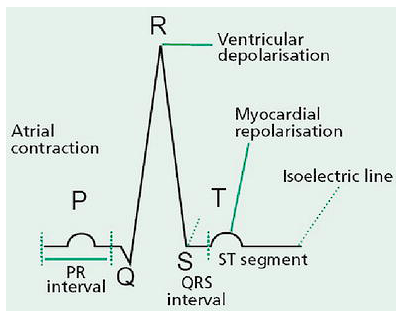 || 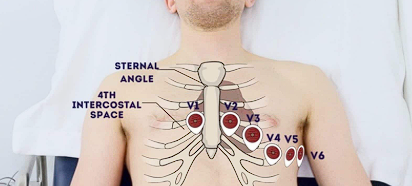 ||| 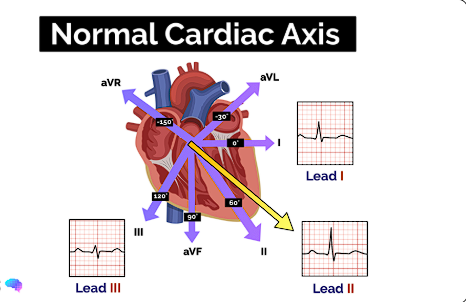

# 1) Exploration du dataset 

In [2]:
pip install wfdb



   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 837.5 kB/s eta 0:00:01
   -------------------- ------------------- 0.5/1.0 MB 837.5 kB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.0 MB 859.5 kB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.0 MB 859.5 kB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 757.0 kB/s eta 0:00:00


In [4]:
import wfdb
import pandas as pd
from IPython.display import display, Markdown

# **fichier .hea**

In [5]:
hea_path = "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/00000/00001_lr.hea"

with open(hea_path, "r") as f:
    header = f.readlines()

print("📌 Contenu du fichier .hea :\n")
for line in header:
    print(line.strip())  # Affiche chaque ligne proprement


📌 Contenu du fichier .hea :

00001_lr 12 100 1000
00001_lr.dat 16 1000.0(0)/mV 16 0 -119 1508 0 I
00001_lr.dat 16 1000.0(0)/mV 16 0 -55 723 0 II
00001_lr.dat 16 1000.0(0)/mV 16 0 64 64758 0 III
00001_lr.dat 16 1000.0(0)/mV 16 0 86 64423 0 AVR
00001_lr.dat 16 1000.0(0)/mV 16 0 -91 1211 0 AVL
00001_lr.dat 16 1000.0(0)/mV 16 0 4 7 0 AVF
00001_lr.dat 16 1000.0(0)/mV 16 0 -69 63827 0 V1
00001_lr.dat 16 1000.0(0)/mV 16 0 -31 6999 0 V2
00001_lr.dat 16 1000.0(0)/mV 16 0 0 63759 0 V3
00001_lr.dat 16 1000.0(0)/mV 16 0 -26 61447 0 V4
00001_lr.dat 16 1000.0(0)/mV 16 0 -39 64979 0 V5
00001_lr.dat 16 1000.0(0)/mV 16 0 -79 832 0 V6


In [6]:


# Charger le signal ECG
dat_path = "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/00000/00001_lr"
record = wfdb.rdrecord(dat_path)

# Afficher les métadonnées de manière structurée
metadata = {
    "Nom du signal": record.record_name,
    "Nombre de dérivations": record.n_sig,
    "Fréquence d'échantillonnage (Hz)": record.fs,
    "Longueur du signal": record.sig_len,
    "Dérivations": ", ".join(record.sig_name),
}

display(Markdown("### 📌 **Informations du signal ECG**"))
df_metadata = pd.DataFrame(metadata.items(), columns=["Propriété", "Valeur"])
display(df_metadata)


### 📌 **Informations du signal ECG**

,Propriété,Valeur
0,Nom du signal,00001_lr
1,Nombre de dérivations,12
2,Fréquence d'échantillonnage (Hz),100
3,Longueur du signal,1000
4,Dérivations,"I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6"


In [7]:
# Création d'un DataFrame pour les dérivations ECG
df_leads = pd.DataFrame({
    "Dérivation": record.sig_name,
    "Gain (µV)": record.adc_gain,
    "Unité": record.units,
    "Offset": record.init_value,
    "Checksum": record.checksum
})

display(Markdown("### 📌 **Détails des Dérivations ECG**"))
display(df_leads)


### 📌 **Détails des Dérivations ECG**

,Dérivation,Gain (µV),Unité,Offset,Checksum
0,I,1000.0,mV,-119,1508
1,II,1000.0,mV,-55,723
2,III,1000.0,mV,64,64758
3,AVR,1000.0,mV,86,64423
4,AVL,1000.0,mV,-91,1211
5,AVF,1000.0,mV,4,7
6,V1,1000.0,mV,-69,63827
7,V2,1000.0,mV,-31,6999
8,V3,1000.0,mV,0,63759
9,V4,1000.0,mV,-26,61447


In [8]:
import wfdb
import matplotlib.pyplot as plt

# Chemin du fichier .dat
dat_path = "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/00000/00001_lr"

# Charger le signal ECG
record = wfdb.rdrecord(dat_path)

# Afficher les métadonnées du signal
print("📌 Informations du signal ECG :")
print(record.__dict__)
print("\n")

# Extraire le signal
signal = record.p_signal
leads = record.sig_name  # Nom des dérivations ECG
fs = record.fs  # Fréquence d'échantillonnage



📌 Informations du signal ECG :
{'record_name': '00001_lr', 'n_sig': 12, 'fs': 100, 'counter_freq': None, 'base_counter': None, 'sig_len': 1000, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat', '00001_lr.dat'], 'fmt': ['16', '16', '16', '16', '16', '16', '16', 

In [11]:
from tabulate import tabulate

# 1️⃣ Tableau des informations générales
general_info = {
    "Clé": ["record_name", "n_sig", "fs", "sig_len", "sig_name", "file_name", "units"],
    "Valeur": [
        record.record_name, record.n_sig, record.fs, record.sig_len, 
        record.sig_name, record.file_name, record.units
    ]
}
df_general = pd.DataFrame(general_info)

# 2️⃣ Tableau des données du signal
signal_info = {
    "Clé": ["p_signal", "d_signal", "e_p_signal", "e_d_signal"],
    "Valeur": [
        str(record.p_signal.shape), record.d_signal, record.e_p_signal, record.e_d_signal
    ]
}
df_signal = pd.DataFrame(signal_info)

# 3️⃣ Tableau des informations sur l'acquisition
acquisition_info = {
    "Clé": ["adc_gain", "baseline", "adc_res", "adc_zero"],
    "Valeur": [record.adc_gain, record.baseline, record.adc_res, record.adc_zero]
}
df_acquisition = pd.DataFrame(acquisition_info)

# 4️⃣ Tableau des données supplémentaires
extra_info = {
    "Clé": ["checksum", "init_value", "block_size"],
    "Valeur": [record.checksum, record.init_value, record.block_size]
}
df_extra = pd.DataFrame(extra_info)

# Affichage des tableaux
print("📌 Informations Générales :")
print(tabulate(df_general, headers="keys", tablefmt="grid"), "\n")

print("📌 Données du Signal :")
print(tabulate(df_signal, headers="keys", tablefmt="grid"), "\n")

print("📌 Informations sur l'Acquisition :")
print(tabulate(df_acquisition, headers="keys", tablefmt="grid"), "\n")

print("📌 Données Supplémentaires :")
print(tabulate(df_extra, headers="keys", tablefmt="grid"), "\n")


📌 Informations Générales :
+----+-------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Clé         | Valeur                                                                                                                                                                                           |
+====+=============+==================================================================================================================================================================================================+
|  0 | record_name | 00001_lr                                                                                                                                                                                         |
+----+-------------+-----------------------------------------------------------------------------------------

In [12]:


# Sélectionner les 5 premières valeurs (1000 samples et 12 leads)
signal_first_values = signal[:5]

# Convertir en DataFrame pour un affichage clair
df_signal = pd.DataFrame(signal_first_values, columns=leads)

# Afficher sous forme de tableau bien formaté
print("📌 Premières valeurs du signal ECG :")
print(tabulate(df_signal, headers="keys", tablefmt="grid"))


📌 Premières valeurs du signal ECG :
+----+--------+--------+-------+-------+--------+-------+--------+--------+--------+--------+--------+--------+
|    |      I |     II |   III |   AVR |    AVL |   AVF |     V1 |     V2 |     V3 |     V4 |     V5 |     V6 |
+====+========+========+=======+=======+========+=======+========+========+========+========+========+========+
|  0 | -0.119 | -0.055 | 0.064 | 0.086 | -0.091 | 0.004 | -0.069 | -0.031 |  0     | -0.026 | -0.039 | -0.079 |
+----+--------+--------+-------+-------+--------+-------+--------+--------+--------+--------+--------+--------+
|  1 | -0.116 | -0.051 | 0.065 | 0.083 | -0.09  | 0.006 | -0.064 | -0.036 | -0.003 | -0.031 | -0.034 | -0.074 |
+----+--------+--------+-------+-------+--------+-------+--------+--------+--------+--------+--------+--------+
|  2 | -0.12  | -0.044 | 0.076 | 0.082 | -0.098 | 0.016 | -0.058 | -0.034 | -0.01  | -0.028 | -0.029 | -0.069 |
+----+--------+--------+-------+-------+--------+-------+--------+--

In [13]:
signal.shape

(1000, 12)

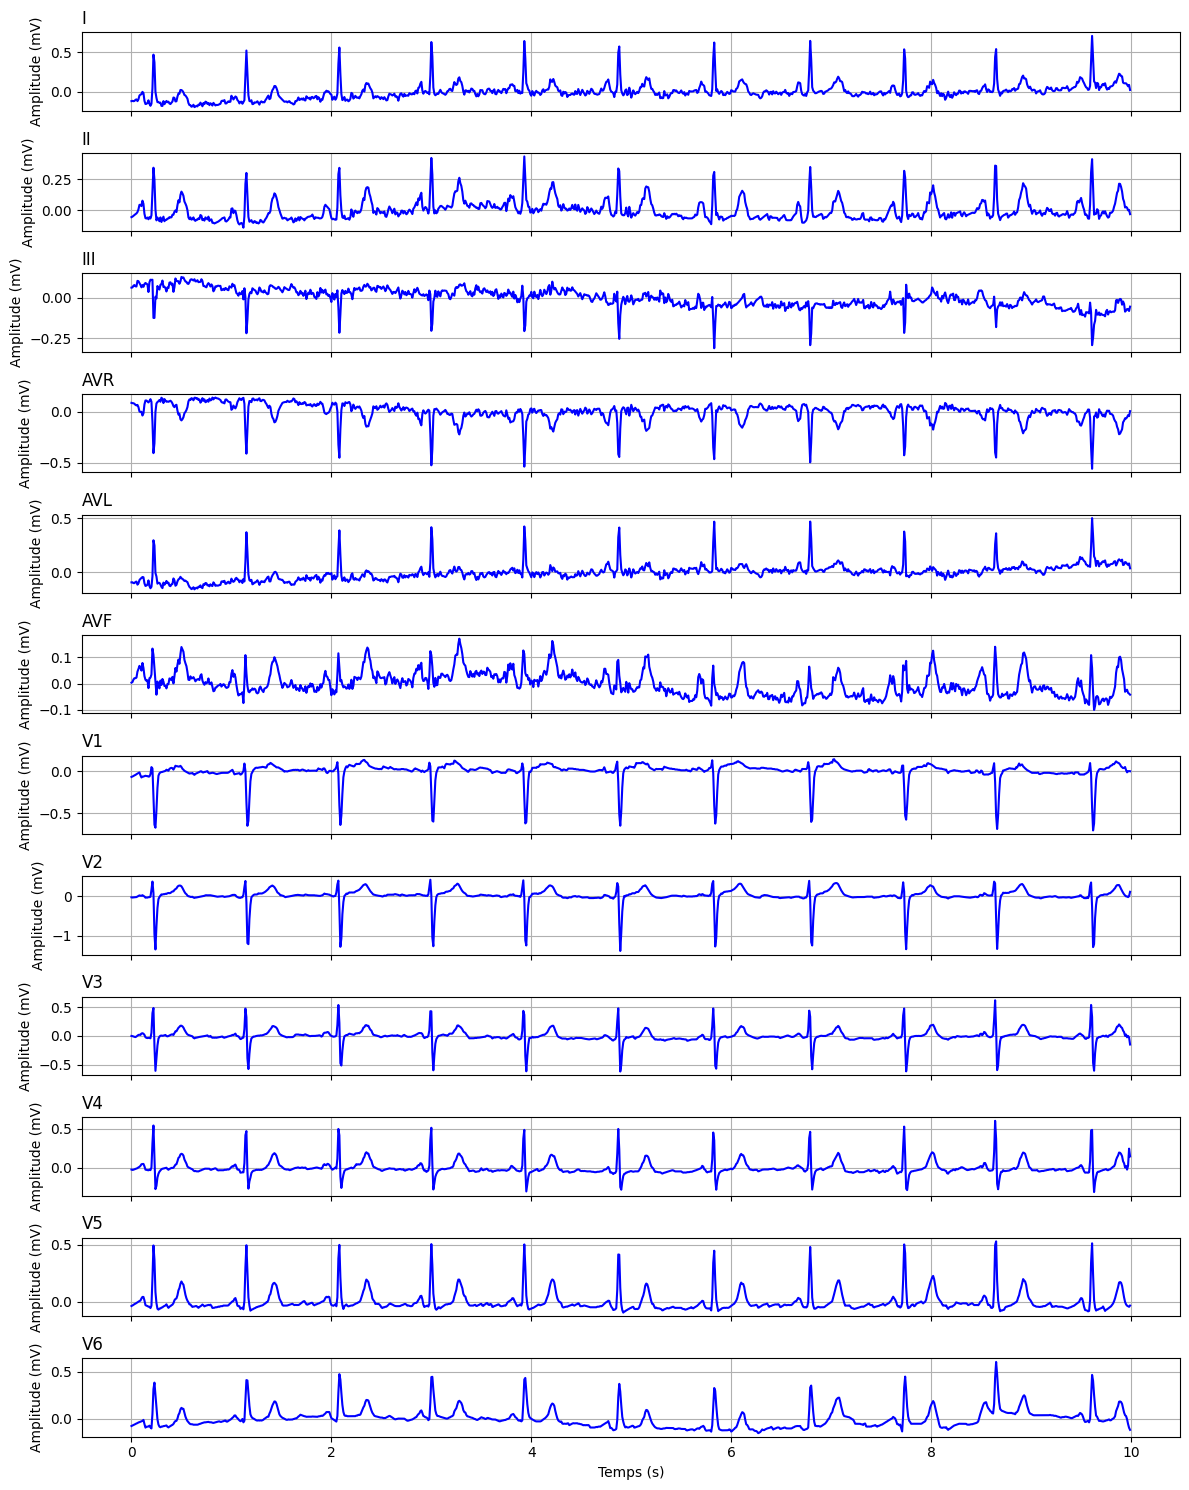

In [14]:
import numpy as np
# Création d'un axe temporel en secondes
time = np.arange(signal.shape[0]) / record.fs

# Liste des noms de dérivations
leads = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# Création d'une figure avec 12 sous-graphes (un pour chaque dérivation)
fig, axes = plt.subplots(12, 1, figsize=(12, 15), sharex=True)

for i in range(12):
    axes[i].plot(time, signal[:, i], color='blue')
    axes[i].set_title(leads[i], loc='left')
    axes[i].grid(True)
    # Vous pouvez ajuster les marges pour un meilleur espacement des tracés
    axes[i].set_ylabel("Amplitude (mV)")

# Configuration de l'axe temporel commun
plt.xlabel("Temps (s)")
plt.tight_layout()
plt.show()


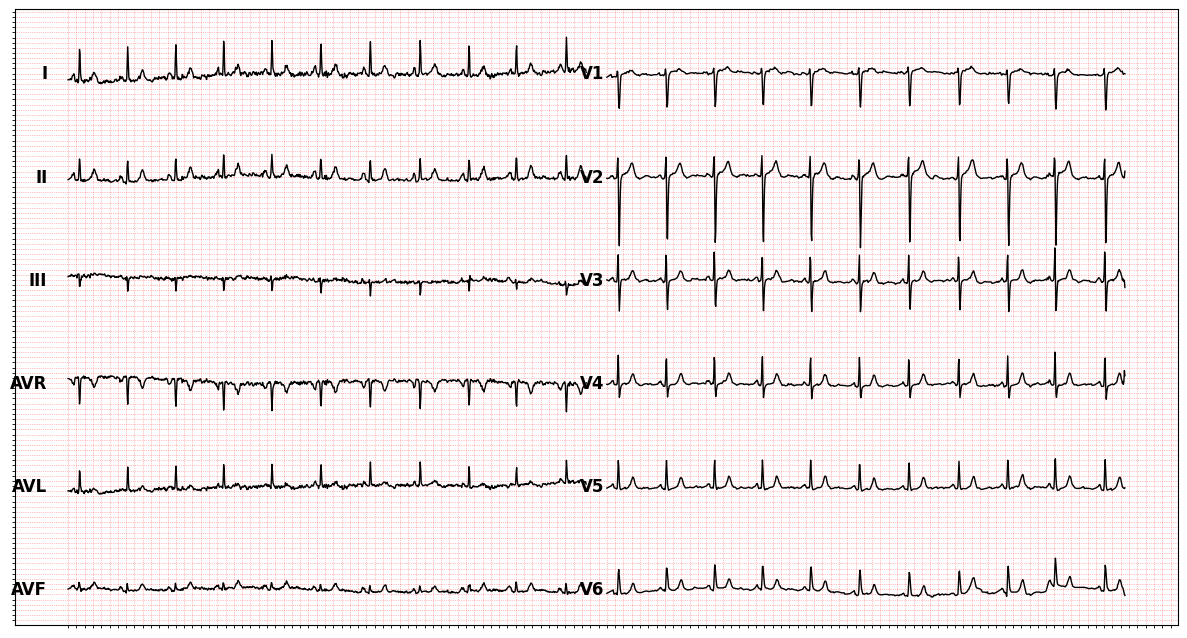

In [15]:
import numpy as np
import matplotlib.pyplot as plt

signal = record.p_signal  # Signal ECG (1000 échantillons x 12 leads)
leads = record.sig_name   # Noms des leads (ex: ['I', 'II', 'III', ..., 'V6'])
fs = record.fs            # Fréquence d'échantillonnage (100 Hz)


# Vérification de la structure du signal
num_samples, num_leads = signal.shape #, il y a 1000 échantillons et 12 dérivations.
assert num_leads == 12, "Le signal doit contenir 12 dérivations"

# Organisation des leads en deux colonnes
leads_left = leads[:6]   # Premiers 6 leads
leads_right = leads[6:]  # Derniers 6 leads

# Paramètres standards d'affichage
speed = 25  # mm/s
amplitude = 10  # mm/mV

# Conversion en unités de l'affichage ECG
time_conversion = speed / fs  # 25 mm/s correspond à fs échantillons
amplitude_conversion = 10  # 10 mm/mV

# Création de la figure
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('white')

# Ajouter le quadrillage ECG
def draw_ecg_grid(ax):
    ax.set_facecolor('white')

    # Quadrillage fin (1 mm, soit 0.04s en horizontal et 0.1mV en vertical)
    ax.set_xticks(np.arange(0, num_samples / fs, 0.04), minor=True)
    ax.set_yticks(np.arange(-11 * amplitude_conversion, 11* amplitude_conversion, 1), minor=True)
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='red', alpha=0.5)

    # Quadrillage épais (5 mm, soit 0.2s en horizontal et 0.5mV en vertical)
    ax.set_xticks(np.arange(0, num_samples / fs, 0.2))
    ax.set_yticks(np.arange(-7 * amplitude_conversion, 7* amplitude_conversion, 5))
    ax.grid(which='major', linestyle='-', linewidth=0.8, color='red', alpha=0.8)

draw_ecg_grid(ax)

# Temps en secondes ajusté à la vitesse d'affichage
time = np.linspace(0, num_samples / fs, num_samples) * time_conversion

# Espacement vertical entre les signaux en tenant compte de l’amplitude
spacing = 2 *amplitude_conversion  # Ajustable pour lisibilité

# Tracé des leads en deux colonnes
for i in range(6):
    # Leads de gauche
    ax.plot(time, signal[:, i] * amplitude_conversion - i * spacing, color='black', linewidth=1)
    ax.text(-0.1, -i * spacing, leads_left[i], fontsize=12, fontweight='bold', ha='right', va='center')

    # Leads de droite (décalés pour être à droite)
    ax.plot(time + 2.6, signal[:, i + 6] * amplitude_conversion - i * spacing, color='black', linewidth=1)
    ax.text(2.59, -i * spacing, leads_right[i], fontsize=12, fontweight='bold', ha='right', va='center')

# Ajuster les limites des axes pour inclure tout le signal ECG

# Suppression des axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(True)

plt.savefig("ecg_plot.png", dpi=300, bbox_inches='tight', transparent=False)

# Affichage du tracé
plt.show()

## prétraitement des données csv:

In [16]:
import pandas as pd 

In [17]:
ptbxl_database=pd.read_csv("ptbxl_database.csv")

In [ ]:
#une copie de ptbxl_database
ptbxl_database2=ptbxl_database.copy()

In [78]:
ptbxl_database.head()   

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [79]:
ptbxl_database.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

***ecg_id,age,sex,height,weight,scp_codes***

***On va préparere une csv qui contient les valeurs qu'on a besoin pour notre modele de Regression***

***on va creer une csv ptbxl_database2:***

In [ ]:
#on va choisir les colonnes : "height","weight": a une condition qu'il ne soient pas null 
#et les colonnes :'ecg_id', 'age', 'sex', 'height', 'weight','filename_lr'
ptbxl_database2 = ptbxl_database2[ptbxl_database2['height'].notnull() & ptbxl_database2['weight'].notnull()]
ptbxl_database2= ptbxl_database2[['ecg_id', 'age', 'sex', 'height', 'weight','filename_lr']]


In [20]:
ptbxl_database2.head(10)

,ecg_id,age,sex,height,weight,filename_lr
100,101,48.0,1,172.0,72.0,records100/00000/00101_lr
115,116,49.0,1,174.0,74.0,records100/00000/00116_lr
135,136,52.0,0,167.0,72.0,records100/00000/00136_lr
138,139,58.0,0,181.0,69.0,records100/00000/00139_lr
139,140,27.0,1,164.0,54.0,records100/00000/00140_lr
145,146,45.0,0,182.0,90.0,records100/00000/00146_lr
155,156,49.0,1,159.0,70.0,records100/00000/00156_lr
191,192,34.0,0,191.0,85.0,records100/00000/00192_lr
252,253,57.0,1,150.0,69.0,records100/00000/00253_lr
254,255,NaN,1,163.0,58.0,records100/00000/00255_lr


### Sexe

$0 \longrightarrow \text{Homme}$

$1 \longrightarrow \text{Femme}$


In [21]:
ptbxl_database2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6756 entries, 100 to 21343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ecg_id       6756 non-null   int64  
 1   age          6680 non-null   float64
 2   sex          6756 non-null   int64  
 3   height       6756 non-null   float64
 4   weight       6756 non-null   float64
 5   filename_lr  6756 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 369.5+ KB


In [22]:
ptbxl_database2.isnull().sum()

ecg_id          0
age            76
sex             0
height          0
weight          0
filename_lr     0
dtype: int64

***on va supprimer toutes les lignes qui ont un age NaN***

In [23]:
ptbxl_database2=ptbxl_database2.dropna()

In [24]:
ptbxl_database2.isnull().sum()

ecg_id         0
age            0
sex            0
height         0
weight         0
filename_lr    0
dtype: int64

In [25]:
ptbxl_database2.shape

(6680, 6)

***notre data apres le filtrage des colonnes elle sera admet 6680 lignes et 6 colonnes***

In [26]:
ptbxl_database2.duplicated().sum()

0

***on va maintenant enrg cette data dans un fichier csv nommé : ptbxl_database2.csv***

In [94]:
ptbxl_database2.to_csv("ptbxl_database2.csv", index=False)

***passant maintenant pour la creation de notre 2 eme csv pour notre modele***

In [27]:
df=pd.read_csv("ecgdeli_features.csv")

In [28]:
df.head()

,ecg_id,PQ_Int_I,PQ_Int_I_iqr,PQ_Int_I_count,PQ_Int_II,PQ_Int_II_iqr,PQ_Int_II_count,PQ_Int_III,PQ_Int_III_iqr,PQ_Int_III_count,...,T_DurFull_aVL_count,T_DurFull_aVR,T_DurFull_aVR_iqr,T_DurFull_aVR_count,T_Dur_Global,T_Dur_Global_iqr,T_Dur_Global_count,HA__Global,HA__Global_iqr,HA__Global_count
0,1,122.0,9.0,11,138.0,6.0,11,204.0,55.0,11,...,11,204.0,72.0,11,316.0,24.0,11,2.0,0.0,1
1,2,146.0,2.0,7,176.0,14.0,7,386.0,30.0,7,...,7,154.0,70.0,7,352.0,123.0,7,4.0,0.0,1
2,3,134.0,6.0,11,136.0,29.0,11,176.0,81.0,11,...,11,208.0,108.0,11,382.0,41.0,11,2.0,0.0,1
3,4,172.0,18.0,13,152.0,28.0,13,172.0,68.0,13,...,13,142.0,8.0,13,256.0,76.0,13,4.0,0.0,1
4,5,138.0,65.0,11,142.0,10.0,11,172.0,32.0,11,...,11,154.0,51.0,11,350.0,102.0,11,4.0,0.0,1


## calcul S_Amp_Global

In [29]:
# Liste des colonnes pour S_Amp
columns_s_amp = [
    'S_Amp_I', 'S_Amp_II', 'S_Amp_III', 'S_Amp_V1', 'S_Amp_V2',
    'S_Amp_V3', 'S_Amp_V4', 'S_Amp_V5', 'S_Amp_V6', 
    'S_Amp_aVF', 'S_Amp_aVL', 'S_Amp_aVR'
]

# Créer la colonne S_Amp_Global avec la moyenne des valeurs
df['S_Amp_Global'] = df[columns_s_amp].mean(axis=1)

# Afficher les premières lignes pour vérifier
print(df[['S_Amp_Global']].head())


   S_Amp_Global
0     -0.033333
1     -0.053333
2     -0.110833
3     -0.294167
4     -0.116667


***pour cette data nous allons travailler seulement avec ces colonnes:***

In [30]:
df=df[['ecg_id','P_Amp_V1', 'P_Amp_II','P_Amp_I','P_Dur_Global','PR_Int_Global','QT_IntFramingham_Global','S_Amp_Global',
'PQ_Int_Global','QRS_Dur_Global','RR_Mean_Global', 'QT_Int_Global']]

In [31]:
df.head()

,ecg_id,P_Amp_V1,P_Amp_II,P_Amp_I,P_Dur_Global,PR_Int_Global,QT_IntFramingham_Global,S_Amp_Global,PQ_Int_Global,QRS_Dur_Global,RR_Mean_Global,QT_Int_Global
0,1,0.01,0.07,0.07,200.0,270.0,570.240,-0.033333,216.0,156.0,935.0,552.0
1,2,0.01,0.08,0.02,236.0,312.0,559.280,-0.053333,254.0,160.0,1276.0,612.0
2,3,0.05,0.07,0.02,203.0,278.0,592.700,-0.110833,222.0,142.0,935.0,580.0
3,4,-0.06,0.02,0.04,230.0,276.0,486.720,-0.294167,216.0,156.0,790.0,454.0
4,5,0.07,0.09,0.00,204.0,272.0,616.635,-0.116667,216.0,160.0,901.0,606.0


***on va enrg ces donnees dans une csv nommé:ecg_mesures.csv***
***note bien :les donnees de deux data ont va les enrg (fusion)***

In [32]:
df_merged = pd.merge(ptbxl_database2, df, on="ecg_id", how="inner")

df_merged.to_csv("ecg_mesures.csv", index=False)

In [33]:
df_merged.isnull().sum()

ecg_id                     0
age                        0
sex                        0
height                     0
weight                     0
filename_lr                0
P_Amp_V1                   0
P_Amp_II                   0
P_Amp_I                    0
P_Dur_Global               0
PR_Int_Global              0
QT_IntFramingham_Global    0
S_Amp_Global               0
PQ_Int_Global              0
QRS_Dur_Global             0
RR_Mean_Global             0
QT_Int_Global              0
dtype: int64

In [34]:
ptbxl_database2.shape

(6680, 6)

In [35]:
df_merged.shape

(6672, 17)

## preparer csv pour classification

Superclasses enumerated by dataset description are as follows:
```
Records | Superclass | Description
9528 | NORM | Normal ECG
5486 | MI | Myocardial Infarction
5250 | STTC | ST/T Change
4907 | CD | Conduction Disturbance
2655 | HYP | Hypertrophy
```

In [36]:
import ast  # Pour évaluer le texte représentant un dictionnaire

# Convertir la colonne 'scp_codes' qui contient des chaînes représentant des dictionnaires en dictionnaires réels
ptbxl_database["scp_codes"] = ptbxl_database["scp_codes"].apply(lambda x: ast.literal_eval(x))

disease_classes = {
    "Myocardial Infarction (MI)": ["IMI", "ASMI"],
    "ST/T Change (STTC)": ["NST_", "NDT", "DIG", "ISC_"],
    "Conduction Disturbance (CD)": ["LAFB"],
    "Hypertrophy (HYP)": ["LVH"],
    "Normal (NORM)": ["NORM"],
}

# Pour chaque classe, créer une colonne indiquant la présence du code dans la ligne correspondante
for disease_name, codes in disease_classes.items():
    ptbxl_database[disease_name] = ptbxl_database["scp_codes"].apply(lambda x: any(code in x.keys() for code in codes))





In [37]:
ptbxl_database.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,Myocardial Infarction (MI),ST/T Change (STTC),Conduction Disturbance (CD),Hypertrophy (HYP),Normal (NORM)
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,False,False,False,False,True
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,False,False,False,False,True
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,False,False,False,False,True
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,False,False,False,False,True
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,False,False,False,False,True


In [199]:
# Liste des colonnes booléennes à transformer
bool_columns = [
    "Myocardial Infarction (MI)",
    "ST/T Change (STTC)",
    "Conduction Disturbance (CD)",
    "Hypertrophy (HYP)",
    "Normal (NORM)"
]

# Convertir les colonnes booléennes en 1 et 0
ptbxl_database[bool_columns] = ptbxl_database[bool_columns].astype(int)


In [200]:
ptbxl_database.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,Myocardial Infarction (MI),ST/T Change (STTC),Conduction Disturbance (CD),Hypertrophy (HYP),Normal (NORM)
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,0,0,0,0,1
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,0,0,0,0,1
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,0,0,0,0,1
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,0,0,0,0,1
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,0,0,0,0,1


In [201]:
ptbxl_database3=ptbxl_database.copy()

In [202]:
ptbxl_database3=ptbxl_database3[['ecg_id','age', 'sex', 'height', 'weight','infarction_stadium1','infarction_stadium2','pacemaker','strat_fold','Myocardial Infarction (MI)','ST/T Change (STTC)','Conduction Disturbance (CD)','Hypertrophy (HYP)','Normal (NORM)' ]]

In [203]:
ptbxl_database3.head()

,ecg_id,age,sex,height,weight,infarction_stadium1,infarction_stadium2,pacemaker,strat_fold,Myocardial Infarction (MI),ST/T Change (STTC),Conduction Disturbance (CD),Hypertrophy (HYP),Normal (NORM)
0,1,56.0,1,NaN,63.0,NaN,NaN,NaN,3,0,0,0,0,1
1,2,19.0,0,NaN,70.0,NaN,NaN,NaN,2,0,0,0,0,1
2,3,37.0,1,NaN,69.0,NaN,NaN,NaN,5,0,0,0,0,1
3,4,24.0,0,NaN,82.0,NaN,NaN,NaN,3,0,0,0,0,1
4,5,19.0,1,NaN,70.0,NaN,NaN,NaN,4,0,0,0,0,1


## Géerer les nulls

In [204]:
ptbxl_database3['infarction_stadium1'] = ptbxl_database3.infarction_stadium1.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)


C:\Users\pc\AppData\Local\Temp\ipykernel_17892\2404505196.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ptbxl_database3['infarction_stadium1'] = ptbxl_database3.infarction_stadium1.replace({


In [205]:
ptbxl_database3['infarction_stadium2'] = ptbxl_database3.infarction_stadium2.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

C:\Users\pc\AppData\Local\Temp\ipykernel_17892\1283317778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ptbxl_database3['infarction_stadium2'] = ptbxl_database3.infarction_stadium2.replace({


In [206]:
import numpy as np
ptbxl_database3['height'] = ptbxl_database3.height
ptbxl_database3.loc[ptbxl_database3.height < 50, 'height'] = np.nan
ptbxl_database3.height.fillna(0, inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_17892\51646234.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ptbxl_database3.height.fillna(0, inplace=True)


In [207]:

ptbxl_database3['age'] = ptbxl_database3.age
ptbxl_database3.age.fillna(0, inplace=True)

ptbxl_database3['sex'] = ptbxl_database3.sex.astype(float)
ptbxl_database3.sex.fillna(0, inplace=True)


ptbxl_database3['weight'] = ptbxl_database3.weight
ptbxl_database3.weight.fillna(0, inplace=True)


ptbxl_database3['pacemaker'] = (ptbxl_database3.pacemaker == 'ja, pacemaker').astype(float)



C:\Users\pc\AppData\Local\Temp\ipykernel_17892\531097968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ptbxl_database3.age.fillna(0, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_17892\531097968.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [208]:
ptbxl_database3

,ecg_id,age,sex,height,weight,infarction_stadium1,infarction_stadium2,pacemaker,strat_fold,Myocardial Infarction (MI),ST/T Change (STTC),Conduction Disturbance (CD),Hypertrophy (HYP),Normal (NORM)
0,1,56.0,1.0,0.0,63.0,0.0,0.0,0.0,3,0,0,0,0,1
1,2,19.0,0.0,0.0,70.0,0.0,0.0,0.0,2,0,0,0,0,1
2,3,37.0,1.0,0.0,69.0,0.0,0.0,0.0,5,0,0,0,0,1
3,4,24.0,0.0,0.0,82.0,0.0,0.0,0.0,3,0,0,0,0,1
4,5,19.0,1.0,0.0,70.0,0.0,0.0,0.0,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,21833,67.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0,1,0,0,0
21833,21834,93.0,0.0,0.0,0.0,4.0,0.0,0.0,4,0,0,0,0,1
21834,21835,59.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0,0
21835,21836,64.0,1.0,0.0,0.0,0.0,0.0,0.0,8,0,0,0,0,1


In [209]:

ptbxl_database3.to_csv("classification.csv", index=False)

In [ ]:
# def load_raw_data(df, sampling_rate, path):
#     if sampling_rate == 100:
#         data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
#     else:
#         data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_hr]
#     data = np.array([signal for signal, meta in data])
#     return data

# sampling_rate = 100

# ECG_data = load_raw_data(ECG_df, sampling_rate, PATH_TO_DATA)

# ECG_data.shape